In [297]:
import string
from nltk.stem import PorterStemmer
def tokenize_doc(content):                          #function to tokenize docs, mentioned in previous file
  for char in string.punctuation:
    content2 = content.replace(char,' ')
  tokens = content2.split()
  #tokens.sort()
  tokens2 = [i.lower() for i in tokens]
  f = open('C:/Users/mmmoi/Python Codes/Stopword-List.txt')
  stop_words = f.read()
  stop_words_list = stop_words.split()
  tokens3 = tokens2.copy()
  #tokens3.sort()
  
  #print(tokens3)

  for i in stop_words_list:
    if i in tokens3:
      tokens3 = [x for x in tokens3 if i!=x]
  tokens4 = tokens3.copy()
  #tokens4 = list(set(tokens3))
  #tokens4.sort()
  tokens5 = tokens4.copy()
  tokens6=[]
  ps = PorterStemmer()
  for i in tokens5:
    tokens6.append(ps.stem(i))
    tokens7 = [i for i in tokens6 if not any(c.isdigit() for c in i)]
  #tokens7.sort()
  tokens8 = [i for i in tokens7 if len(i)>1]
  #print(tokens7)
  return tokens8

In [298]:
import re
import os
import codecs

def cleanhtml(raw_html):               #same function as previous file
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [299]:
import pickle
#loading probabilities for course features
with open('conditional_probablity_course_bernoulli.txt', 'rb') as handle:
    data = handle.read()

conditional_probablity_course = pickle.loads(data)
conditional_probablity_course

{'algorithm': 0.11278195488721804,
 'alt': 0.007518796992481203,
 'architectur': 0.09022556390977443,
 'assign': 0.5714285714285714,
 'class': 0.47368421052631576,
 'click': 0.15789473684210525,
 'code': 0.24060150375939848,
 'comput': 0.6541353383458647,
 'cornel': 0.09022556390977443,
 'cours': 0.8345864661654135,
 'cs': 0.6766917293233082,
 'current': 0.15789473684210525,
 'data': 0.16541353383458646,
 'databas': 0.12781954887218044,
 'dayton': 0.05263157894736842,
 'depart': 0.23308270676691728,
 'department': 0.015037593984962405,
 'design': 0.21052631578947367,
 'develop': 0.05263157894736842,
 'distribut': 0.09774436090225563,
 'edu': 0.007518796992481203,
 'email': 0.2556390977443609,
 'end': 0.09022556390977443,
 'engin': 0.10526315789473684,
 'fall': 0.45112781954887216,
 'file': 0.3157894736842105,
 'from': 0.43609022556390975,
 'gener': 0.39097744360902253,
 'grade': 0.49624060150375937,
 'graduat': 0.07518796992481203,
 'group': 0.16541353383458646,
 'here': 0.263157894736

In [300]:
with open('conditional_probablity_non_course_bernoulli.txt', 'rb') as handle:
    data = handle.read()
#loading probabilities for non-course features
conditional_probablity_non_course = pickle.loads(data)
conditional_probablity_non_course

{'algorithm': 0.17011494252873563,
 'alt': 0.004597701149425287,
 'architectur': 0.14942528735632185,
 'assign': 0.027586206896551724,
 'class': 0.1103448275862069,
 'click': 0.14482758620689656,
 'code': 0.04827586206896552,
 'comput': 0.7977011494252874,
 'cornel': 0.31264367816091954,
 'cours': 0.15402298850574714,
 'cs': 0.25517241379310346,
 'current': 0.3080459770114943,
 'data': 0.1471264367816092,
 'databas': 0.15862068965517243,
 'dayton': 0.25287356321839083,
 'depart': 0.5333333333333333,
 'department': 0.04367816091954023,
 'design': 0.21149425287356322,
 'develop': 0.23908045977011494,
 'distribut': 0.21149425287356322,
 'edu': 0.0022988505747126436,
 'email': 0.0735632183908046,
 'end': 0.022988505747126436,
 'engin': 0.26666666666666666,
 'fall': 0.1425287356321839,
 'file': 0.06206896551724138,
 'from': 0.36091954022988504,
 'gener': 0.19080459770114944,
 'grade': 0.01839080459770115,
 'graduat': 0.27816091954022987,
 'group': 0.18620689655172415,
 'here': 0.23218390804

In [301]:
#loading class probabilities 
f = open("counts_prob.txt", "r")
p_c = float(f.readline())
n_c = float(f.readline())
f.close()

In [302]:
p_c

0.2322695035460993

In [303]:
n_c

0.7677304964539007

In [304]:
features = []
#loading features
with open('features.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        features.append(currentPlace)

In [305]:
def naive_bayes_multinomial(doc):
    doc = tokenize_doc(doc)
    x=0
    count_w_new = {f:0 for f in features}
    new_doc_featured = []
    for i in doc:
            for k in features:
                if i==k:
                    count_w_new[k] = count_w_new[k] + 1
                    new_doc_featured.append(i)
    score_course = 1
    for i in features:
        if i in new_doc_featured:
            score_course = score_course * pow(conditional_probablity_course[i],count_w_new[i]) 
            #using the formula of multinomial naive bayes
    non_course_score = 1
    for i in features:
        if i in new_doc_featured:
            non_course_score = non_course_score * pow(conditional_probablity_non_course[i],count_w_new[i])
             #using the formula of multinomial naive bayes
    #multiplying each by class probablity
    score_course = score_course*p_c
    non_course_score = non_course_score*n_c
    
    if (score_course>non_course_score):
        return 1   #indicates course
    else:
        return 0  #indicates non_course

In [306]:
def naive_bayes_bernoulli(doc):
    doc = tokenize_doc(doc)
    x=0
    count_w_new = {f:0 for f in features}
    new_doc_featured = []
    for i in doc:
            for k in features:
                if i==k:
                    count_w_new[k] = count_w_new[k] + 1
                    new_doc_featured.append(i)
    score_course = 1
    for i in features:
        if i in new_doc_featured:
            score_course = score_course * conditional_probablity_course[i]
        else:
            score_course = score_course * (1-conditional_probablity_course[i])
            #using the formula of bernoulli naive bayes
    non_course_score = 1
    for i in features:
        if i in new_doc_featured:
            non_course_score = non_course_score * conditional_probablity_non_course[i]
        else:
            non_course_score = non_course_score * (1-conditional_probablity_non_course[i])   
        #using the formula of bernoulli naive bayes
    score_course = score_course*p_c
    non_course_score = non_course_score*n_c
    if (score_course>non_course_score):
        return 1
    else:
        return 0

In [307]:
directory = r'C:\Users\mmmoi\Python Codes\course-cotrain-data\fulltext\course'
course_results = []
for filename in os.listdir(directory):
    if not filename.endswith('.html'):     #reading not .html files for testing
        fname = os.path.join(directory, filename)
        file = codecs.open(os.path.abspath(fname), "r", encoding = "ISO-8859-1")
        doc = cleanhtml(file.read())
        course_results.append(naive_bayes_bernoulli(doc))  #using bernoulli as it gave better results

In [308]:
directory = r'C:\Users\mmmoi\Python Codes\course-cotrain-data\fulltext\non-course'
non_course_results = []
for filename in os.listdir(directory):
    if not filename.endswith('.html'):     #reading not .html files for testing
        fname = os.path.join(directory, filename)
        file = codecs.open(os.path.abspath(fname), "r", encoding = "ISO-8859-1")
        doc = cleanhtml(file.read())
        #print(naive_bayes(doc))
        non_course_results.append(naive_bayes_bernoulli(doc))  #using bernoulli as it gave better results

In [309]:
course_results.count(1)
non_course_results.count(1)

12

In [310]:
cf_matrix = [[non_course_results.count(0),non_course_results.count(1)],[course_results.count(0),course_results.count(1)]]
#making a confusion matrix for representation and evaluation of the model

In [311]:
cf_matrix

[[376, 12], [24, 75]]

<AxesSubplot:>

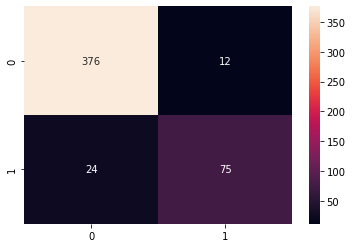

In [312]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='g')  #displaying results in form of confusion matrix

In [313]:
import numpy as np
cf_matrix = np.array(cf_matrix)

<AxesSubplot:>

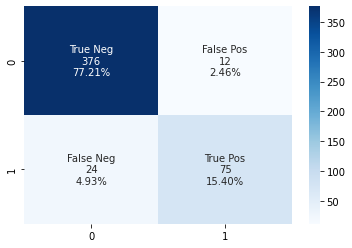

In [314]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#displaying results with labels

In [315]:
tn = cf_matrix[0][0]
tp = cf_matrix[1][1]
fp = cf_matrix[0][1]
fn = cf_matrix[1][0]

The following are metrics of evaluation

In [316]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)

In [317]:
recall

0.7575757575757576

In [318]:
precision

0.8620689655172413

In [319]:
accuracy = (tp + tn)/(tn + fn + tp + fp)

In [320]:
accuracy

0.9260780287474333

In [321]:
f1_score = 2*precision*recall/(precision+recall)

In [322]:
f1_score

0.8064516129032258

Conclusion: Features were selected on all 3 criterias mentioned, training and testing data was splitted based on extension to make work easier. Files were stored to reduce the speec of prediction. File 1 is required to be executed 1 time only. 
All conditional prbablities were calculated manually for both naive bayes multinomial and bernoulli, and were tested on both.
Bernoulli gave better results hence that is the one shown here. The classifiers were also implemneted from scratch. 
Libraries were used for lexical chain and tagging of nouns. Top idf scores were also calculated manually.

In [ ]:
from tkinter import *
from tkinter import filedialog

#interface for classifying documents after selecting

def openFile():
    tf = filedialog.askopenfilename(
        initialdir="C:/Users/MainFrame/Desktop/", 
        title="Open Text file", 
        filetypes=(("Text Files", "*"),)
        )
    pathh.insert(END, tf)
    tf = open(tf)  # or tf = open(tf, 'r')
    data = tf.read()
    c = naive_bayes_bernoulli(cleanhtml(data))
    if c==0:
        txtarea.insert(END, 'Non-course\n')
    else:
        txtarea.insert(END, 'Course\n')
    tf.close()
    
ws = Tk()
ws.title("Assignment 3")
ws.geometry("400x450")
ws['bg']='#fb0'

txtarea = Text(ws, width=40, height=20)
txtarea.pack(pady=20)

pathh = Entry(ws)
pathh.pack(side=LEFT, expand=True, fill=X, padx=20)



Button(
    ws, 
    text="Open File", 
    command=openFile
    ).pack(side=RIGHT, expand=True, fill=X, padx=20)


ws.mainloop()